# Linear Support Vector Machine: Soft Margin
----------------------------------

This function shows how to use TensorFlow to create a soft margin SVM

We will use the iris data, specifically:

$x_1 =$ Sepal Length

$x_2 =$ Petal Width

Class 1 : `I. setosa`

Class -1: `not I. setosa`

We know here that x and y are linearly seperable for I. setosa classification.


>Note that we implement the soft margin with an allowable margin of error for points.  The margin of error term is given by 'alpha' below.  To behave like a hard margin SVM, set alpha = 0. (in notebook code block #7)

In [288]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

Set a random seed and start a computational graph.

In [289]:
np.random.seed(41)
tf.set_random_seed(41)
sess = tf.Session()

Load the data

In [290]:
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

Split data into train/test sets

In [291]:
def split_dataset():
    train_indices = np.random.choice(len(x_vals),
                                 round(len(x_vals)*0.8),
                                 replace=False)
    test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
    x_vals_train = x_vals[train_indices]
    x_vals_test = x_vals[test_indices]
    y_vals_train = y_vals[train_indices]
    y_vals_test = y_vals[test_indices]
    
    return train_indices, x_vals_train, x_vals_test, y_vals_train, y_vals_test

train_indices, x_vals_train, x_vals_test, y_vals_train, y_vals_test = split_dataset()

Set model parameters, placeholders, and coefficients.

In [292]:
# Declare batch size
batch_size = 110

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for SVM
A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

Declare our model and L2 Norm

SVM linear model is given by the equation:

$$\left[ \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - y_i(A \cdot x - b)) \right] + \alpha \cdot ||A||^{2}$$

Our loss function will be the above quantity and we will tell TensorFlow to minimize it. Note that $n$ is the number of points (in a batch), $A$ is the hyperplane-normal vector (to solve for), $b$ is the hyperplane-offset (to solve for), and $\alpha$ is the soft-margin parameter.

In [293]:
# Declare model operations
model_output = tf.subtract(tf.matmul(x_data, A), b)

# Declare vector L2 'norm' function squared
l2_norm = tf.reduce_sum(tf.square(A))

Here we make our special loss function based on the classification of the points (which side of the line they fall on).

Also, note that `alpha` is the soft-margin term and an be increased to allow for more erroroneous classification points.  For hard-margin behaviour, set `alpha = 0`.

In [294]:
# Declare loss function
# Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha
alpha = tf.constant([ 0.01])

# Margin term in loss
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))

# Put terms together
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

Creat the prediction function, optimization algorithm, and initialize the variables.

In [295]:
# Declare prediction function
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

# Declare optimizer
my_opt = tf.train.AdamOptimizer(0.005)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

Now we can start the training loop.

In [296]:
# Training loop
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)

    train_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_train,
        y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)

    test_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_test,
        y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)

    if (i + 1) % 75 == 0:
        print('Step #{} A = {}, b = {}'.format(
            str(i+1),
            str(sess.run(A)),
            str(sess.run(b))
        ))
        print('Loss = ' + str(temp_loss))

Step #75 A = [[0.6558717 ]
 [0.73911524]], b = [[0.8189382]]
Loss = [3.477592]
Step #150 A = [[0.30816343]
 [0.3704745 ]], b = [[1.1589305]]
Loss = [1.8780789]
Step #225 A = [[0.05462871]
 [0.01647458]], b = [[1.3756665]]
Loss = [0.61916494]
Step #300 A = [[ 0.07212595]
 [-0.10345356]], b = [[1.2971927]]
Loss = [0.504363]
Step #375 A = [[ 0.08859634]
 [-0.21521746]], b = [[1.2148455]]
Loss = [0.5586718]
Step #450 A = [[ 0.10291164]
 [-0.33477652]], b = [[1.1402792]]
Loss = [0.60125]
Step #525 A = [[ 0.11994893]
 [-0.46245807]], b = [[1.0622479]]
Loss = [0.47920564]
Step #600 A = [[ 0.14473143]
 [-0.59787565]], b = [[0.9706151]]
Loss = [0.5689049]
Step #675 A = [[ 0.16315348]
 [-0.7438242 ]], b = [[0.88169694]]
Loss = [0.5465381]
Step #750 A = [[ 0.1782505 ]
 [-0.90523636]], b = [[0.79121387]]
Loss = [0.4725425]
Step #825 A = [[ 0.20881133]
 [-1.0663068 ]], b = [[0.6807161]]
Loss = [0.41729364]
Step #900 A = [[ 0.23536843]
 [-1.2360393 ]], b = [[0.56941783]]
Loss = [0.29453847]
Step #97

Now we extract the linear coefficients and get the SVM boundary line.

In [297]:
# Extract coefficients
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1

# Extract x1 and x2 vals
x1_vals = [d[1] for d in x_vals]

# Get best fit line
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)

# Separate I. setosa
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

Matplotlib code for plotting

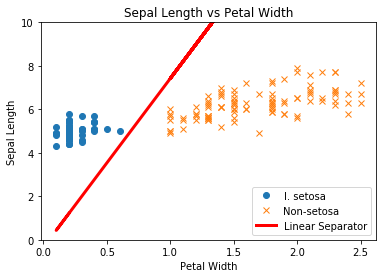

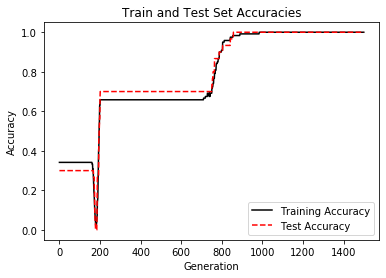

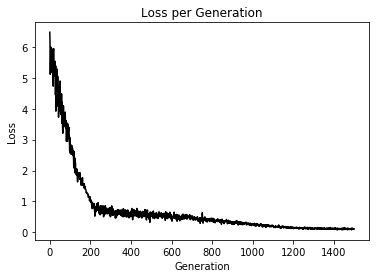

In [298]:
%matplotlib inline
# Plot data and line
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')

plt.show()
# Plot train/test accuracies
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

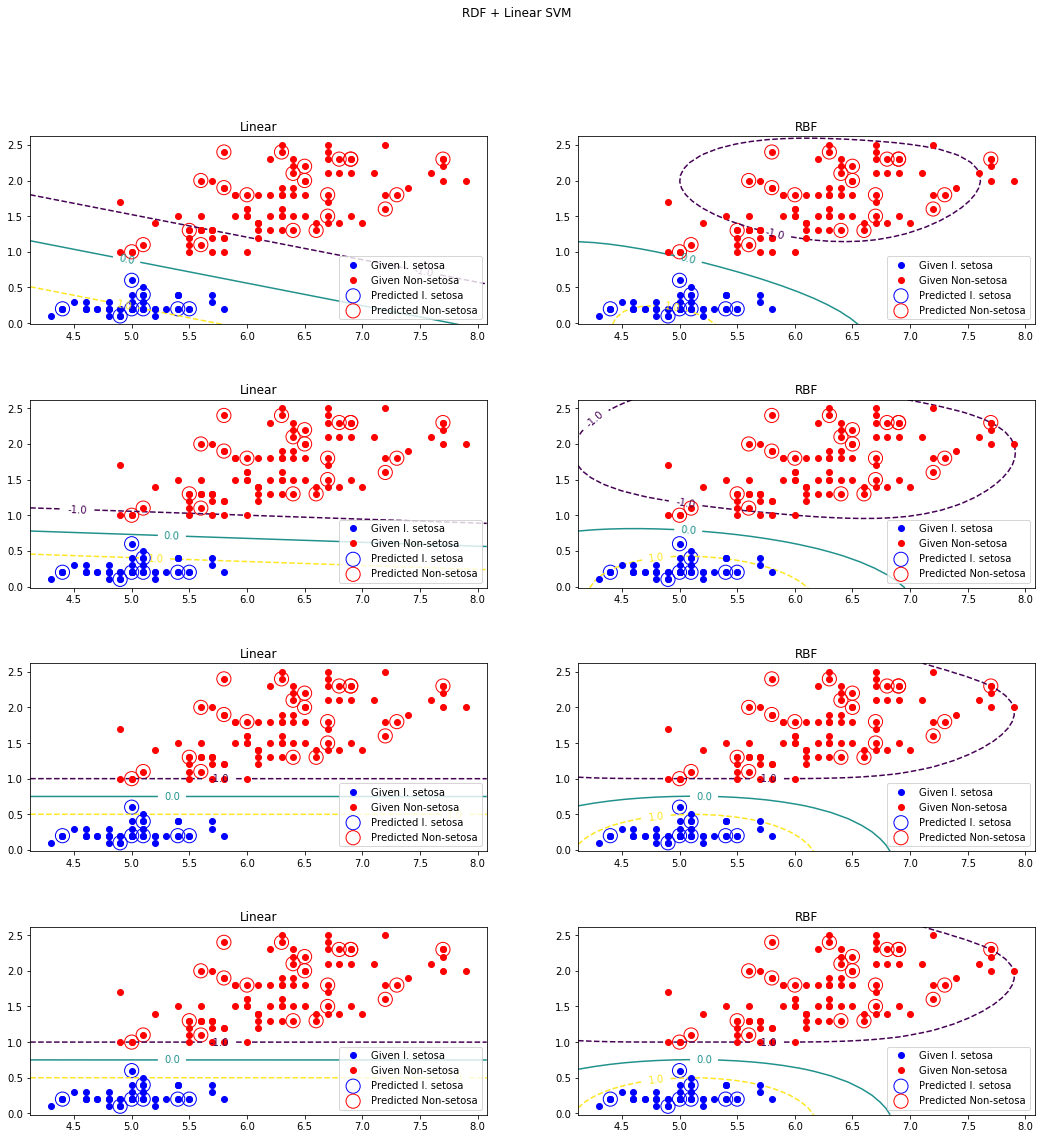

In [305]:
from sklearn import svm
train_indices, x_vals_train, x_vals_test, y_vals_train, y_vals_test = split_dataset()


X = x_vals_train
y = y_vals_train
# Draw all given dataset t compare with predicted and transparency
setosa_x, setosa_y,not_setosa_x,not_setosa_y = is_sentosa(x_vals, y_vals)

def is_sentosa(x_vals, y_vals):
    setosa_x = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
    setosa_y = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
    not_setosa_x = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]
    not_setosa_y = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
    return setosa_x,setosa_y,not_setosa_x,not_setosa_y

def subplot(ax, clf):
    
#     ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    f = lambda c: "C={0}".format(c) 

    # plot decision boundary and margins
    countor = ax.contour(XX, YY, Z, levels=[-1, 0, 1],# alpha=0.5,
               linestyles=['--', '-', '--'])
    
#     fmt = {}
#     for l, s in zip(countor.levels, [c]*3):
#         fmt[l] = f(s)
        
    ax.clabel(countor,inline=True, fmt='%1.1f', fontsize=10)
    
def process_clf(fig, idx, clf, title):
    
    clf.fit(x_vals_train, y_vals_train)
    
    ax = fig.add_subplot(rows, cols, idx)
    
#     ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax.plot(setosa_x, setosa_y, 'bo', label='Given I. setosa')
    ax.plot(not_setosa_x, not_setosa_y, 'ro', label='Given Non-setosa')
        
    subplot(ax, clf)
    
    predicted = clf.predict(x_vals_test)
    
    psetosa_x, psetosa_y, pnot_setosa_x, pnot_setosa_y = is_sentosa(x_vals_test, predicted)
    ax.scatter(psetosa_x, psetosa_y, s=200,
           linewidth=1, facecolors='none', edgecolors='b', label='Predicted I. setosa')
    ax.scatter(pnot_setosa_x, pnot_setosa_y, s=200,
           linewidth=1, facecolors='none', edgecolors='r', label='Predicted Non-setosa')
    ax.legend(loc='lower right')
    plt.title(title)


cs = [0.10, 1, 10, 100]
fig = plt.figure(figsize=(18,18))
fig.suptitle('RDF + Linear SVM')
rows, cols = len(cs), 2

for i, c in enumerate(cs):
    clf = svm.SVC(kernel='linear', gamma='scale', C=c)
    process_clf(fig, cols*i+1, clf, 'Linear')
    
    clf = svm.SVC(gamma='auto', C=c)
    process_clf(fig, cols*i+2, clf, 'RBF')    


#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

In [ ]:
fig = plt.figure(figsize=(18,10))
fig.suptitle('Search for Parameters')
rows, cols = 1, 1

C = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters = {'kernel':['linear', 'rbf'], 'C': C, 'gamma' : gammas}

svc = svm.SVC(gamma="scale")
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc, parameters, cv=5)
process_clf(fig, 1, clf, 'Linear')


plt.show()